In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
fl = '../../data/obt_slim.csv'
df = pd.read_csv(fl)

C:\Users\batoo\AppData\Local\Temp\ipykernel_21440\3821095275.py:2: DtypeWarning: Columns (6,10,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fl)


In [270]:
for c in df.columns:
    if 'readmission' in c:
        print(c)

readmissions_footnote
excess_readmission_ratio
predicted_readmission_rate
expected_readmission_rate
number_of_readmissions
number_of_readmissions.1
readmission_rate
has_readmissions_data


In [9]:
sns.set_style('whitegrid')
sns.set_palette("Set1")

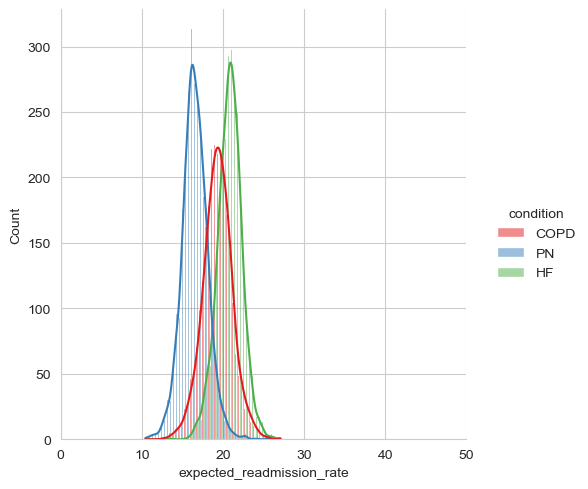

In [315]:
sns.displot(df,x='expected_readmission_rate',hue='condition',kde=True,multiple='dodge',facet_kws={"xlim":(0,50)})

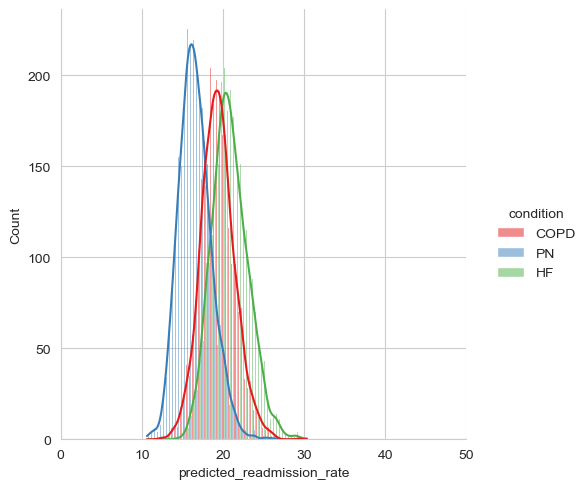

In [316]:
sns.displot(df,x='predicted_readmission_rate',hue='condition',kde=True,multiple='dodge',facet_kws={"xlim":(0,50)})

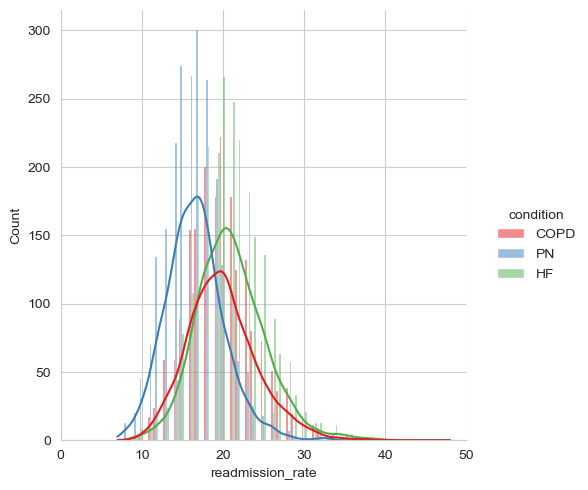

In [317]:
sns.displot(df,x='readmission_rate',hue='condition',kde=True,multiple='dodge',facet_kws={"xlim":(0,50)})

In [12]:
readm = df.melt(id_vars=['county_name','condition'],value_vars=['expected_readmission_rate','predicted_readmission_rate'])
readm.dropna(subset='value',inplace=True)

In [13]:
readm.head()

,county_name,condition,variable,value
0,HOUSTON,COPD,expected_readmission_rate,19.3765
1,HOUSTON,PN,expected_readmission_rate,17.7701
2,HOUSTON,HF,expected_readmission_rate,21.8333
3,MARSHALL,COPD,expected_readmission_rate,18.2089
4,MARSHALL,PN,expected_readmission_rate,16.0472


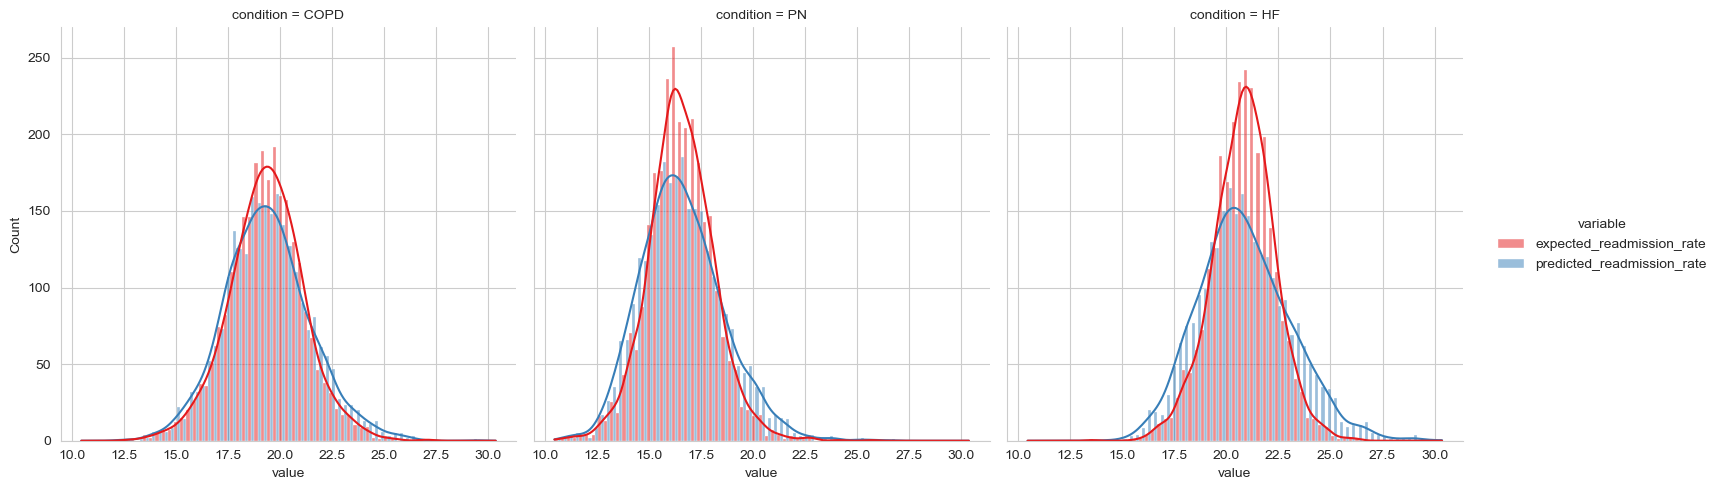

In [14]:
sns.displot(readm,x='value',col='condition',hue='variable',multiple="dodge",kde=True)

In [224]:
bins=[0,7.5,11,14,17,19.5,22,25,28.5,32,36,41.5,50,100]
bins = [0,50,100]
nval, bin_edges = np.histogram(df['below_150_poverty_pct'],bins=bins)

for nv,b in zip(nval,bin_edges):
    print(b,'\t',nv)

0 	 11518
50 	 907


In [225]:
df['below_150_poverty_category'] = pd.cut(df['below_150_poverty_pct'],bins=bins)

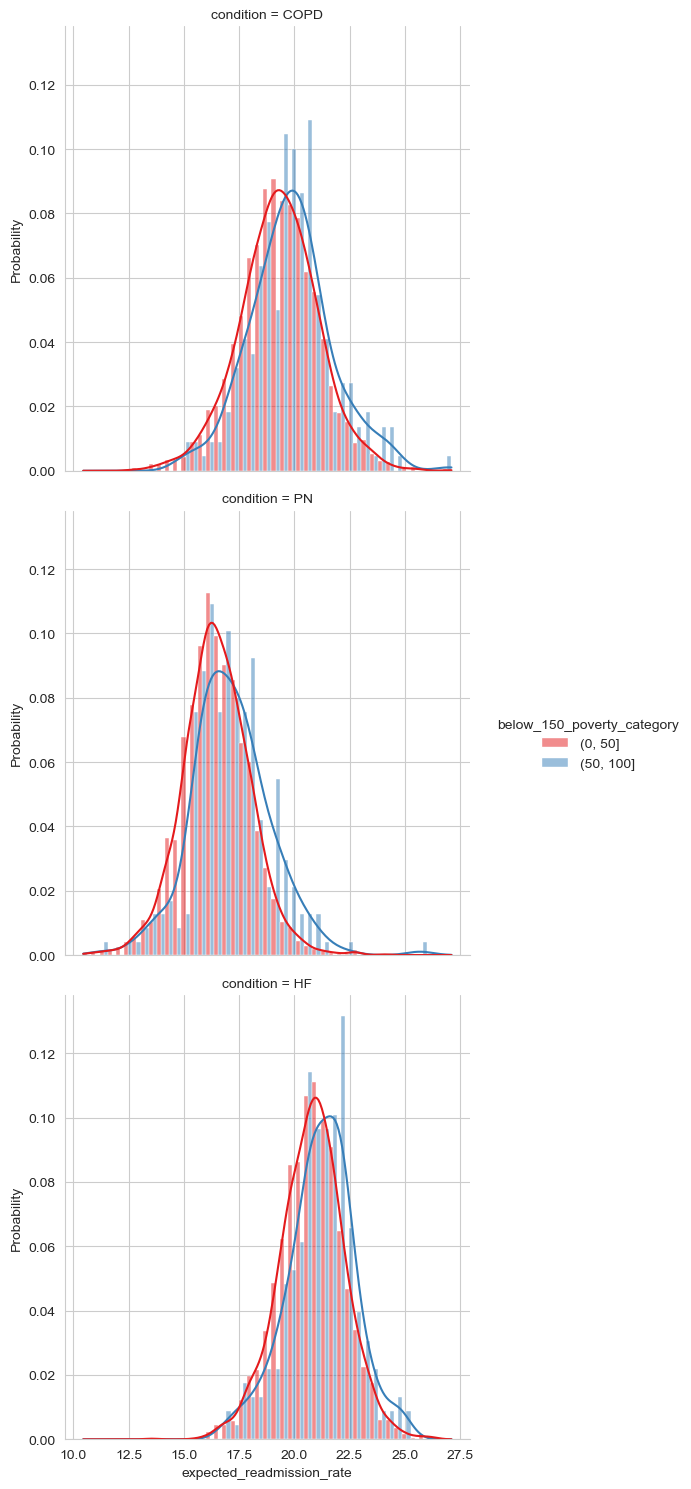

In [275]:
sns.displot(df,x='expected_readmission_rate',row='condition',hue='below_150_poverty_category',multiple="dodge",kde=True,stat='probability',common_norm=False)

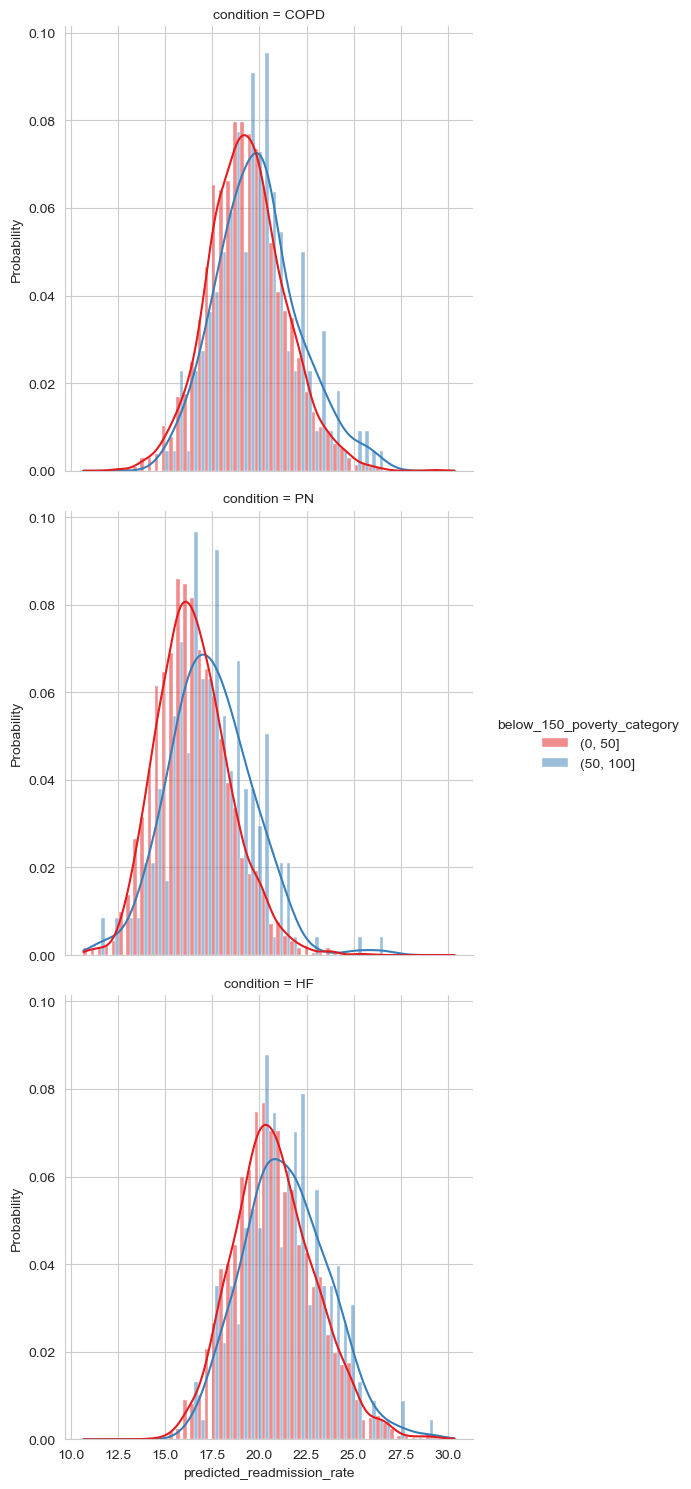

In [276]:
sns.displot(df,x='predicted_readmission_rate',row='condition',hue='below_150_poverty_category',multiple="dodge",kde=True,stat='probability',common_norm=False)

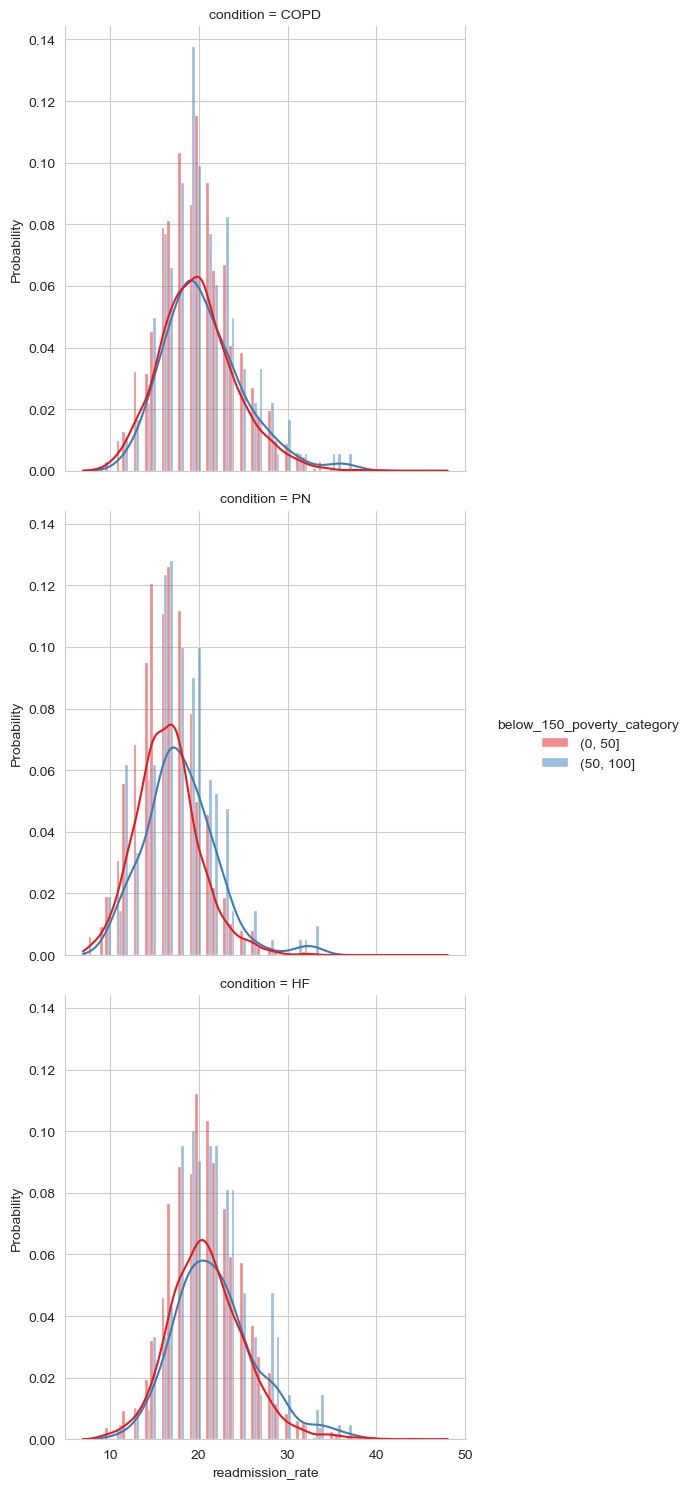

In [318]:
sns.displot(df,x='readmission_rate',row='condition',hue='below_150_poverty_category',multiple="dodge",kde=True,stat='probability',common_norm=False)

In [320]:
feat='below_150_poverty_is_90_percentile'
#feat='housing_cost_burdened_is_90_percentile'
#feat='no_hs_diploma_is_90_percentile'
#feat='aged_65_over_is_90_percentile'
invalid_value = -999

In [321]:
df[feat].value_counts()

 0      10898
 1       1494
-999       33
Name: below_150_poverty_is_90_percentile, dtype: int64

In [322]:
readm = df.melt(id_vars=['county_name','condition',feat],value_vars=['expected_readmission_rate','predicted_readmission_rate'])
readm.dropna(subset='value',inplace=True)
readm = readm.query('{}!= {}'.format(feat,invalid_value))

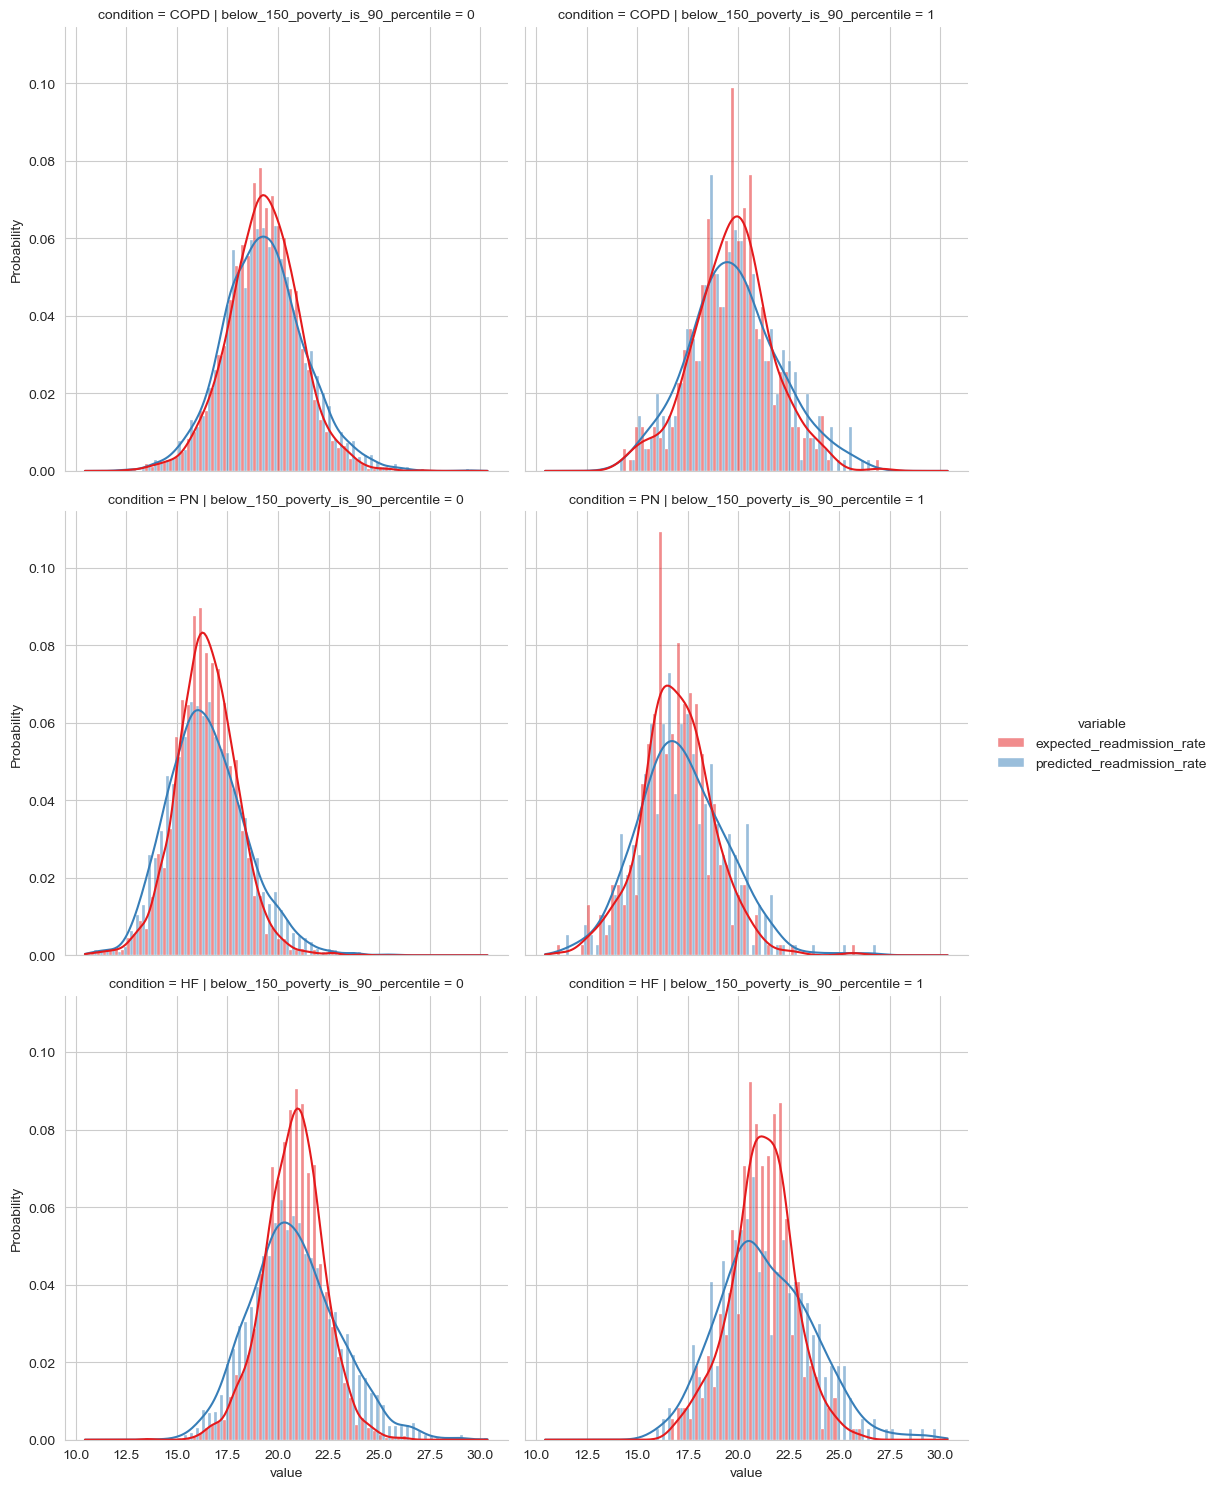

In [323]:
sns.displot(readm,x='value',row='condition',col=feat,hue='variable',multiple="dodge",kde=True,stat='probability',common_norm=False)

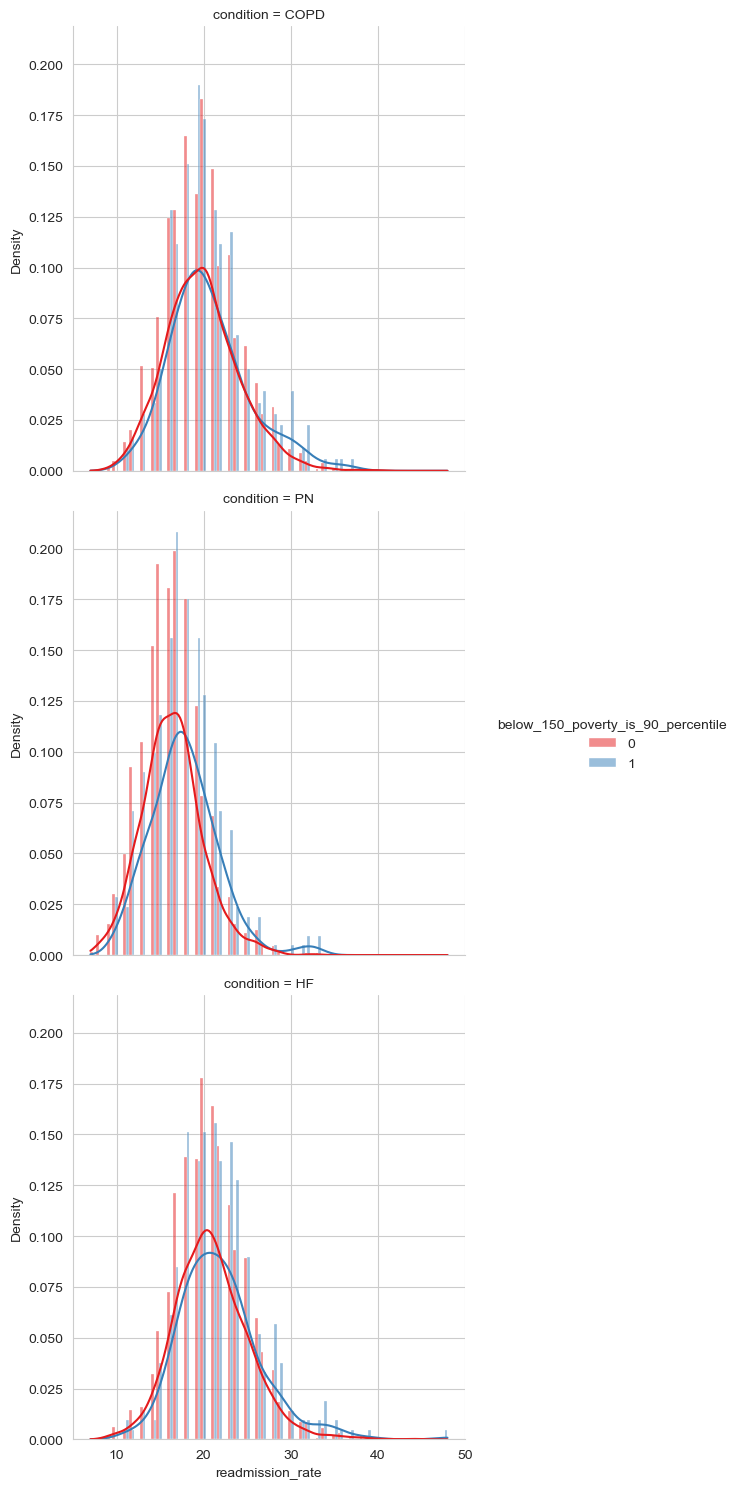

In [325]:
sns.displot(df.query('{}!= {}'.format(feat,invalid_value)),x='readmission_rate',row='condition',hue=feat,multiple="dodge",kde=True,stat='density',common_norm=False)


Following code used to generate statistics and figures in ( https://docs.google.com/presentation/d/1K75caY6KCMdTEoqCMV054NLqac9H2BjfkLBQiUIFQOo/edit?usp=sharing )

In [334]:
df.dropna(subset='readmission_rate',inplace=True)

In [384]:
high_readm_val = np.quantile(df['readmission_rate'],0.9)

25.0

In [359]:
df['readmission_rate'] >= high_readm_val

0       False
1       False
2       False
3       False
4       False
        ...  
9432    False
9433     True
9438    False
9439    False
9440    False
Name: readmission_rate, Length: 6753, dtype: bool

In [363]:
df['high_readm'] = df['readmission_rate'] >= high_readm_val

In [608]:
feat_var = 'limited_english'

In [609]:
feat = feat_var+'_is_90_percentile'

print(df.query('high_readm == True and {} != -999'.format(feat)).agg({'{}'.format(feat):'sum'}), len( df.query('high_readm == True and {} != -999'.format(feat))))
print(df.query('high_readm == False and {} != -999'.format(feat)).agg({'{}'.format(feat):'sum'}),len( df.query('high_readm == False and {} != -999'.format(feat))))

limited_english_is_90_percentile    95
dtype: int64 786
limited_english_is_90_percentile    326
dtype: int64 5947


In [577]:
feat = feat_var+'_is_90_percentile'

print(100*df.query('high_readm == True and {} != -999'.format(feat)).agg({'{}'.format(feat):'sum'}) / len( df.query('high_readm == True and {} != -999'.format(feat))))
print(100*df.query('high_readm == False and {} != -999'.format(feat)).agg({'{}'.format(feat):'sum'}) / len( df.query('high_readm == False and {} != -999'.format(feat))))

no_vehicle_is_90_percentile    22.576531
dtype: float64
no_vehicle_is_90_percentile    13.273739
dtype: float64


In [568]:
# from matplotlib import pyplot as plt

# ct = df.query('high_readm == True and {} != -999'.format(feat)).agg({'{}'.format(feat):'sum'})/ len( df.query('high_readm == True and {} != -999'.format(feat)))
# ct2 = df.query('high_readm == False and {} != -999'.format(feat)).agg({'{}'.format(feat):'sum'})/ len( df.query('high_readm == False and {} != -999'.format(feat)))

# plt.barh(y=[0,1],width=[ct.values[0],ct2.values[0]])
# plt.barh(y=[0,1],width=[1-ct.values[0],1-ct2.values[0]],left=[ct.values[0],ct2.values[0]])

In [569]:
# feat_var = 'other_race'

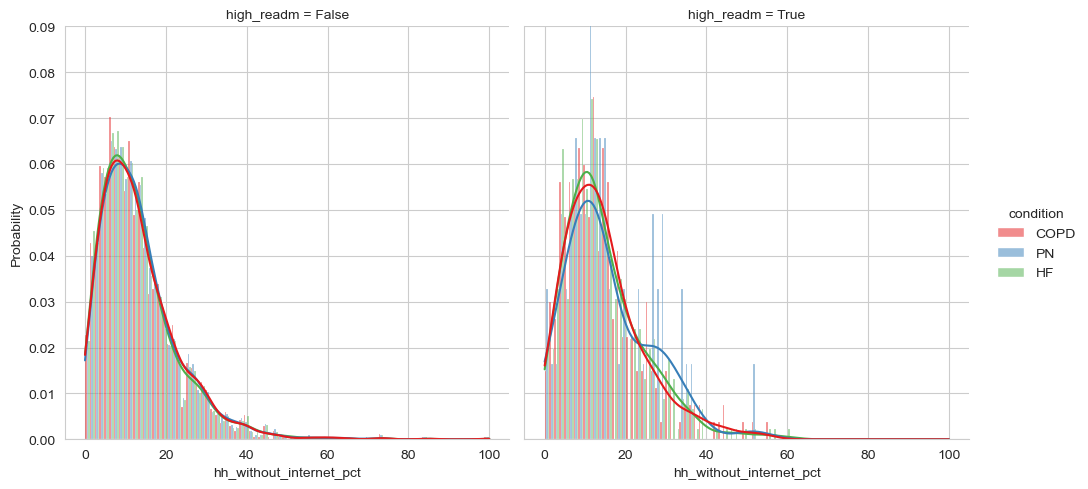

In [573]:
feat = feat_var+'_pct'
#feat = feat_var+'_rate'

sns.displot(df.query('{} != -999'.format(feat)),x='{}'.format(feat),hue='condition',col='high_readm',kde=True,stat='probability',multiple='dodge',common_norm=False,facet_kws={"ylim":(0,0.09)})